In [36]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn

In [37]:
df= pd.read_excel('Sheola_SW173_2020-2022.xlsx',sheet_name=0)
df.head()

,Date,Water Level (m)
0,01-JAN-20,4.75
1,02-JAN-20,4.75
2,03-JAN-20,4.77
3,04-JAN-20,4.80
4,05-JAN-20,4.85


In [38]:
df.dtypes

Date                object
Water Level (m)    float64
dtype: object

In [40]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [42]:
df.head()

,Date,Water Level (m)
0,2020-01-01,4.75
1,2020-01-02,4.75
2,2020-01-03,4.77
3,2020-01-04,4.80
4,2020-01-05,4.85


In [43]:
df.set_index('Date')

,Water Level (m)
Date,
2020-01-01 00:00:00,4.75
2020-01-02 00:00:00,4.75
2020-01-03 00:00:00,4.77
2020-01-04 00:00:00,4.80
2020-01-05 00:00:00,4.85
...,...
2022-09-07 12:00:00,10.01
2022-09-07 15:00:00,9.99
2022-09-07 18:00:00,9.98


In [25]:
# df = df.drop('Max WL', axis = 1)
# df = df.drop('Min WL', axis = 1)
# df.head()


In [44]:
df['Water Level (m)'] = df['Water Level (m)'].to_numpy()
df1 = df.resample('M', on='Date').agg(np.mean)
df1.head()

,Water Level (m)
Date,
2020-01-31,4.358710
2020-02-29,3.312759
2020-03-31,3.186129
2020-04-30,3.255667
2020-05-31,5.543871


In [45]:
df1.to_excel('WL_mean_monthly_Sheola_SW173_2020-2022.xlsx')

In [47]:
df2= pd.read_excel('WL_mean_monthly_Sheola_SW173_2020-2022.xlsx')
df2.head()

,Date,Water Level (m)
0,2020-01-31,4.358710
1,2020-02-29,3.312759
2,2020-03-31,3.186129
3,2020-04-30,3.255667
4,2020-05-31,5.543871


In [49]:
df2['Month'] = df2['Date'].apply(lambda x: x.strftime('%B')) 
df2.head()

,Date,Water Level (m),Month
0,2020-01-31,4.358710,January
1,2020-02-29,3.312759,February
2,2020-03-31,3.186129,March
3,2020-04-30,3.255667,April
4,2020-05-31,5.543871,May


In [50]:
month_order = ['January','February','March','April','May','June','July','August','September','November','December']
df2 = df2.set_index(df2["Month"]).loc[month_order]

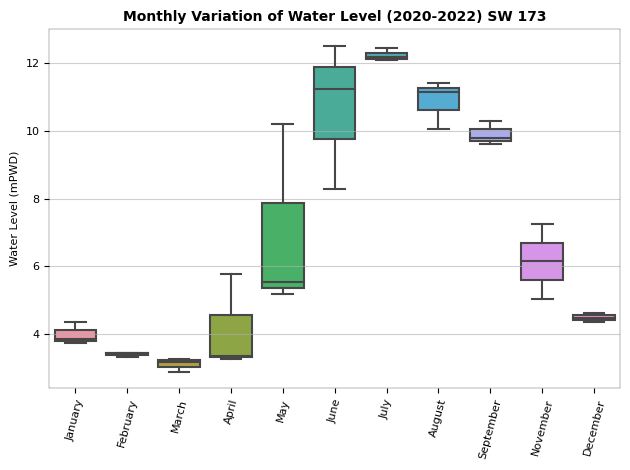

In [51]:
# plt.rcParams["figure.figsize"] = [5.6, 2.8]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,1, squeeze= True)
plt.xticks(rotation = 75)
# plt.xticks(range(11), ['January','February','March','April','May','June','July','August','September','November','December'], rotation=75)
seaborn.boxplot (x = df2['Month'], y = df2['Water Level (m)'],
                ax = ax)

plt.title("Monthly Variation of Water Level (2020-2022) SW 173", fontsize=10, fontweight = 'semibold')
plt.xlabel('')
plt.ylabel('Water Level (mPWD)', fontsize=8)
# plt.xticks(list(np.arange(0, 12, 1)), alpha=1)
# plt.yticks(list(np.arange(6.5, 9, .5)), alpha=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0.2)
plt.savefig("Water Level (2020-2022) SW 173.png", dpi=500)